In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("C:\\Users\\chand\\Downloads\\twitter_training.csv\\twitter_training.csv")
df.head()

,ID,APPLICATION,SENTIMENT,TWEET
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           74682 non-null  int64 
 1   APPLICATION  74682 non-null  object
 2   SENTIMENT    74682 non-null  object
 3   TWEET        73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [3]:
df.dropna

<bound method DataFrame.dropna of          ID  APPLICATION SENTIMENT  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                   TWEET  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac wind

# Data Preprocessing

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Step 3: Clean the text data

# Initialize the lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

#removing numeric values
df["TWEET"] = df["TWEET"].str.replace("\d", "", regex=True)

# Remove punctuation including underscores
df["TWEET"] = df["TWEET"].str.replace("[^\w\s]", "", regex=True)

#converting tweet to lower case text
df["TWEET"] = df["TWEET"].apply(lambda x: " ".join(str(x).lower().split()) if pd.notnull(x) else '')

In [5]:
def clean_text(text): 
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

df['CLEAN_TWEET'] = df['TWEET'].apply(clean_text)

# Data Visuialization

[('game', 9001), ('like', 4369), ('get', 4128), ('im', 3770), ('play', 3270), ('one', 3078), ('time', 2825), ('really', 2650), ('good', 2645), ('new', 2617)]


<Axes: >

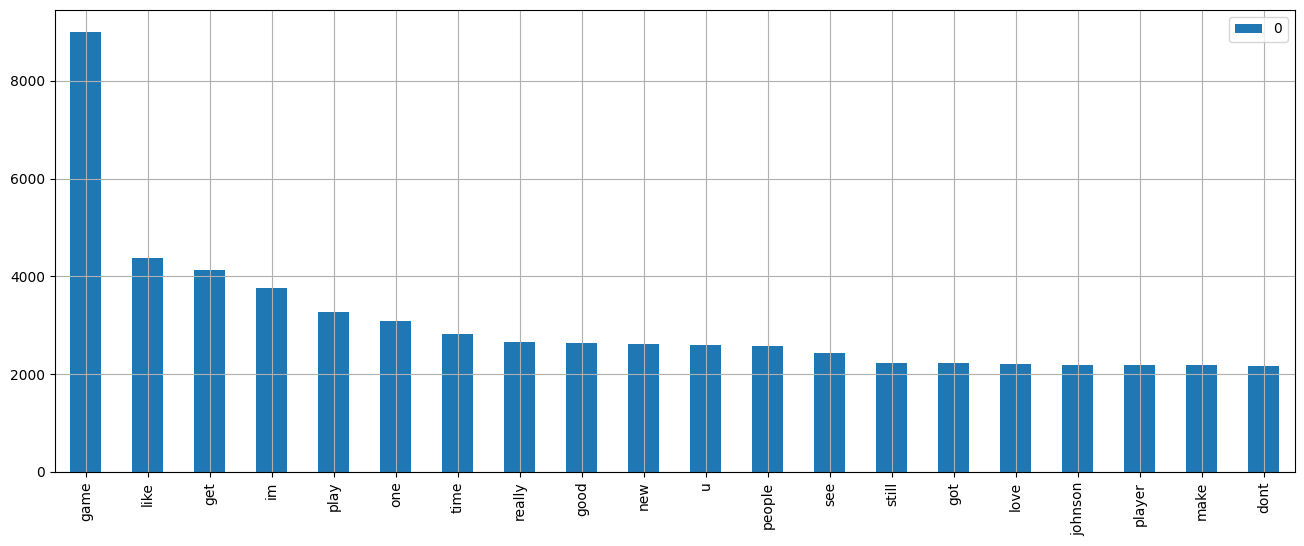

In [6]:
from nltk.probability import FreqDist
text_list = []
for index, row in df.iterrows():
 text_list.append((row['CLEAN_TWEET']))

total_words = ''.join(text_list)
total_words = word_tokenize(total_words)
freq_words = FreqDist(total_words)
word_frequency = FreqDist(freq_words)
print(word_frequency.most_common(10))
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

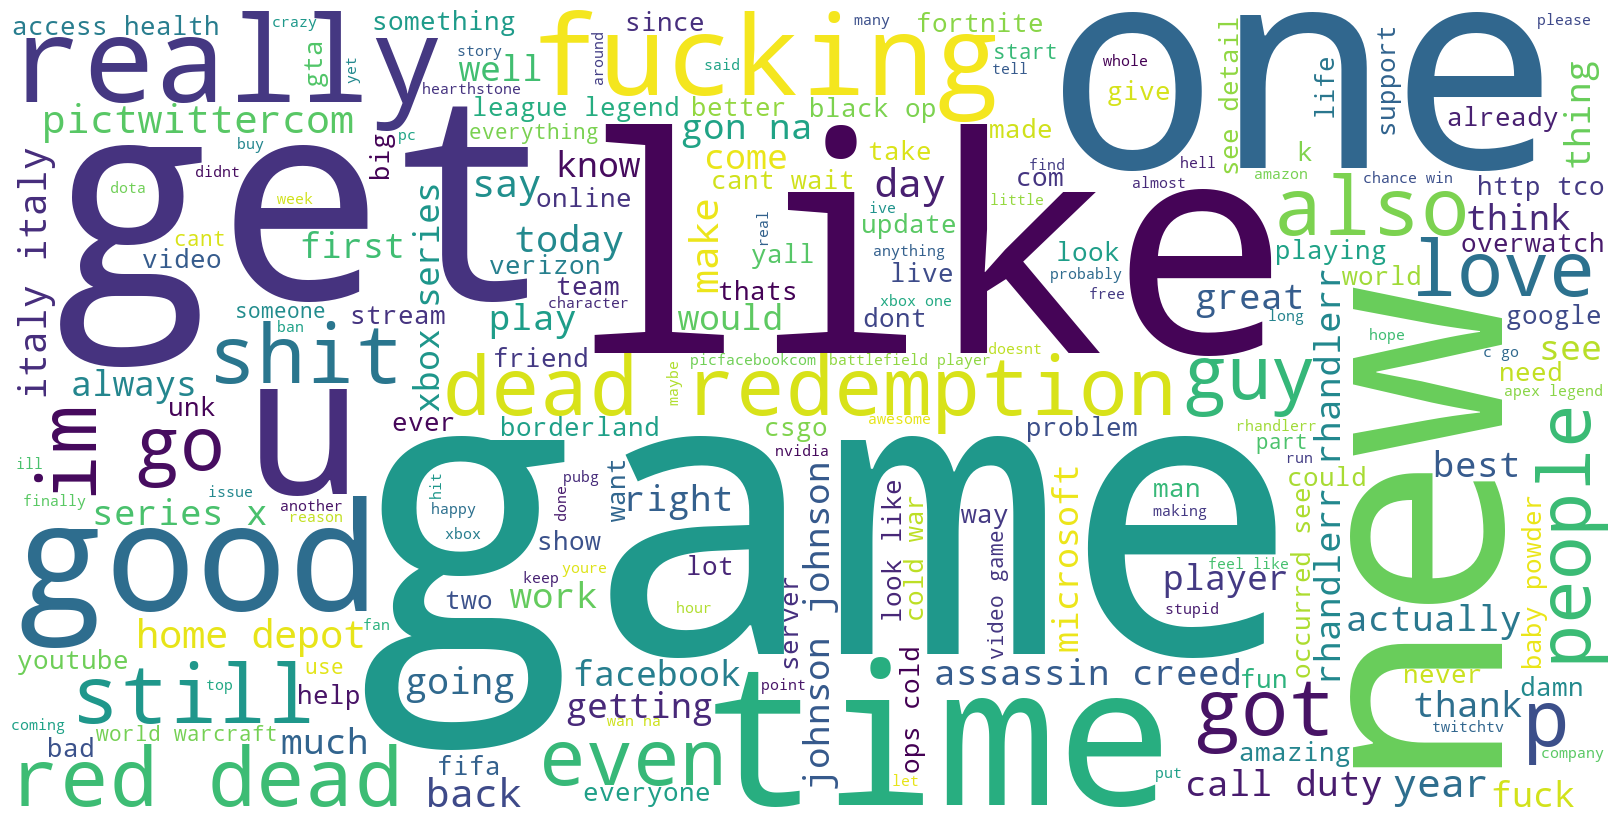

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud_common_words=[]
for index, row in df.iterrows():
    word_cloud_common_words.append((row['CLEAN_TWEET']))

wordcloud = WordCloud(
    width = 1600, height = 800,
    background_color ='white',
    stopwords = stop_words,
    min_font_size = 5).generate(''.join(word_cloud_common_words))

# plot the WordCloud image
plt.figure(figsize = (16, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [12]:
#Top 10 most common words
from collections import Counter
text = ' '.join(word_cloud_common_words)
word_counts = Counter(text.split())
most_common_words = word_counts.most_common(10)
for word, count in most_common_words:
    print(f'{word}: {count}')

game: 10353
like: 4961
im: 4942
get: 4368
one: 3718
play: 3613
good: 3565
time: 3498
love: 3322
really: 3260


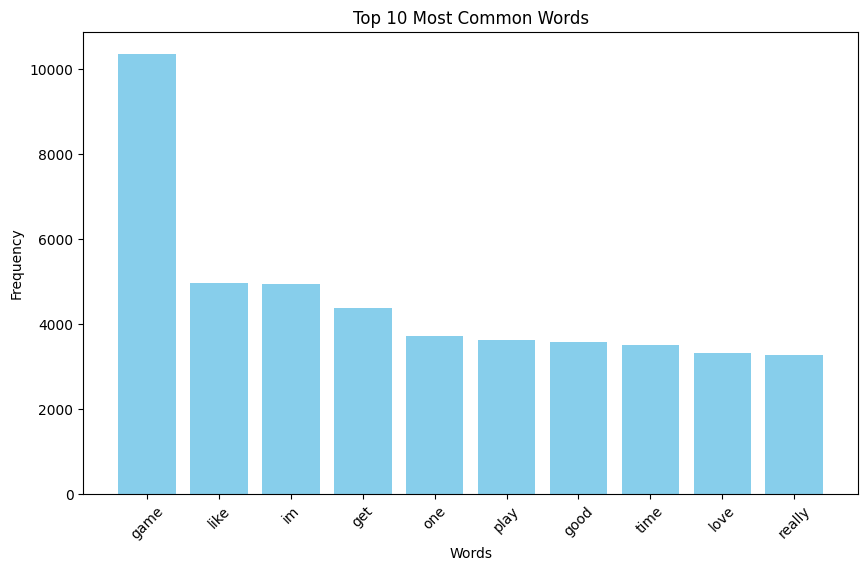

In [13]:
top_10_words = dict(word_counts.most_common(10))
plt.figure(figsize=(10, 6))
plt.bar(top_10_words.keys(), top_10_words.values(), color='skyblue')
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

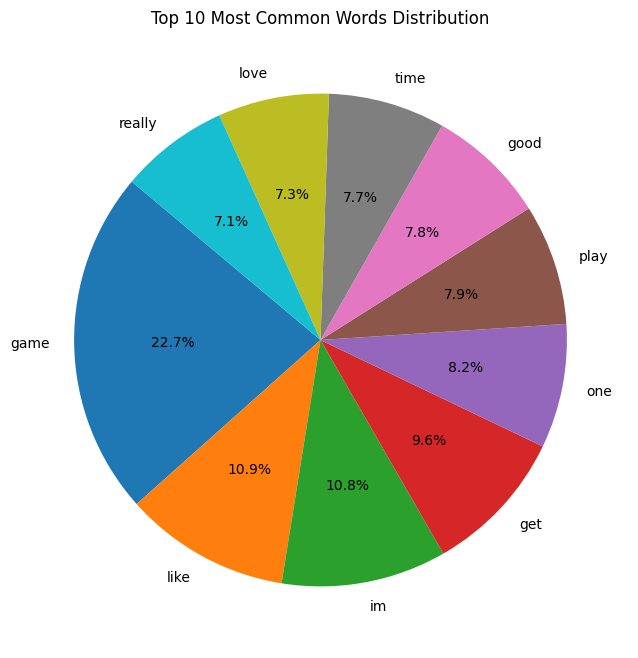

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_words.values(), labels=top_10_words.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Most Common Words Distribution')
plt.show()

In [16]:
#sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['compound_score'] = df['CLEAN_TWEET'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df[['CLEAN_TWEET', 'compound_score', 'sentiment']])

                                             CLEAN_TWEET  compound_score  \
0                           im getting borderland murder         -0.6908   
1                                     coming border kill         -0.6908   
2                             im getting borderland kill         -0.6908   
3                            im coming borderland murder         -0.6908   
4                           im getting borderland murder         -0.6908   
...                                                  ...             ...   
74677  realized window partition mac like year behind...          0.3612   
74678  realized mac window partition year behind nvid...          0.0000   
74679  realized window partition mac year behind nvid...          0.0000   
74680  realized window partition mac like year behind...          0.3612   
74681  like window partition mac like year behind dri...          0.6124   

      sentiment  
0      negative  
1      negative  
2      negative  
3      negative

In [20]:
#Frequency Analysis (CountVectorizer and TF-IDF(Term Frequency-Inverse Document Frequency))
from sklearn.feature_extraction.text import CountVectorizer
df['tokenized_words'] = df['CLEAN_TWEET'].apply(word_tokenize)
df['tokenized_words'] = df['tokenized_words'].apply(lambda x: ' '.join(x))
count_vectorizer = CountVectorizer()
count_vectorized_data = count_vectorizer.fit_transform(df['tokenized_words'])

print(type(count_vectorized_data), count_vectorized_data.shape)
print(df.head())

<class 'scipy.sparse._csr.csr_matrix'> (74682, 35172)
     ID  APPLICATION SENTIMENT  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                               TWEET  \
0  im getting on borderlands and i will murder yo...   
1  i am coming to the borders and i will kill you...   
2  im getting on borderlands and i will kill you all   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands and i will murder yo...   

                    CLEAN_TWEET  compound_score sentiment  \
0  im getting borderland murder         -0.6908  negative   
1            coming border kill         -0.6908  negative   
2    im getting borderland kill         -0.6908  negative   
3   im coming borderland murder         -0.6908  negative   
4  im getting borderland murder         -0.6908  negative   

                tokenized_words  
0  

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = \
    train_test_split(count_vectorized_data,df['sentiment'], test_size=0.3, random_state=42)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((52277, 35172), (52277,), (22405, 35172), (22405,))

In [30]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data using MaxAbsScaler and then applies logistic regression
pipeline = make_pipeline(MaxAbsScaler(), LogisticRegression(max_iter=200))

pipeline.fit(X_train, y_train)
print(accuracy_score(pipeline.predict(X_val), y_val) * 100)


91.26980584690916


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_vectorized_data = tfidf.fit_transform(df['CLEAN_TWEET'])
X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(tfidf_vectorized_data, df['sentiment'], test_size=0.3, random_state=42)
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_tfidf, y_train_tfidf)
predictions_tfidf = model_tfidf.predict(X_val_tfidf)
accuracy_tfidf = accuracy_score(predictions_tfidf, y_val_tfidf) * 100
print("TF-IDF Accuracy:", accuracy_tfidf)

TF-IDF Accuracy: 91.09573755858067
